# **Data Preprocessing**

In [1]:
import pandas as pd
import numpy as np

In [2]:
income_ds = pd.read_csv('/content/Income Dataset (50k).csv')

In [3]:
income_ds.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [4]:
income_ds.shape

(43957, 15)

In [5]:
income_ds.isnull().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [6]:
income_subset = income_ds[income_ds['workclass'].notnull()]
df = income_subset[income_subset['occupation'].notnull()]
df.shape

(41451, 15)

In [7]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
educational-num      0
marital-status       0
occupation           0
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     724
income_>50K          0
dtype: int64

In [8]:
df = df.fillna(df['native-country'].value_counts().index[0])
df.shape

(41451, 15)

In [9]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income_>50K        0
dtype: int64

In [10]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


In [11]:
print((df['capital-loss'] == 0).sum())
print((df['capital-gain'] == 0).sum())

39471
37979


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41451 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              41451 non-null  int64 
 1   workclass        41451 non-null  object
 2   fnlwgt           41451 non-null  int64 
 3   education        41451 non-null  object
 4   educational-num  41451 non-null  int64 
 5   marital-status   41451 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     41451 non-null  object
 8   race             41451 non-null  object
 9   gender           41451 non-null  object
 10  capital-gain     41451 non-null  int64 
 11  capital-loss     41451 non-null  int64 
 12  hours-per-week   41451 non-null  int64 
 13  native-country   41451 non-null  object
 14  income_>50K      41451 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.1+ MB


In [13]:
from sklearn.preprocessing import LabelEncoder

categorical_features = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "gender", "native-country"]

for i in categorical_features:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i].values)

In [14]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,2,366425,10,16,0,3,1,4,1,99999,0,60,38,1
1,17,2,244602,2,8,4,7,3,4,1,0,0,15,38,0
2,31,2,174201,9,13,2,3,0,4,1,0,0,40,38,1
3,58,5,110199,5,4,2,13,0,4,1,0,0,40,38,0
4,25,5,149248,15,10,4,7,1,2,1,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,2,68982,9,13,2,3,0,4,1,0,0,50,38,1
43953,19,2,116562,11,9,4,7,3,4,0,0,0,40,38,0
43954,30,2,197947,15,10,0,11,1,4,1,0,0,58,38,0
43955,46,2,97883,9,13,4,11,1,4,0,0,0,35,38,0


In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

scaler.fit(X)
X_scaled = scaler.transform(X)

# **Logistic Regression**

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

lr_score = accuracy_score(y_test, predictions)
lr_score

0.8187190929924014

# **Decision Tree Classifier**

In [17]:
from sklearn.tree import DecisionTreeClassifier

model_decision_tree = DecisionTreeClassifier(criterion='entropy',random_state=1)
model_decision_tree.fit(x_train, y_train)
predictions = model_decision_tree.predict(x_test)

dt_score = accuracy_score(y_test, predictions)
dt_score

0.8095525268363285

### **Comparison using matplotlib**

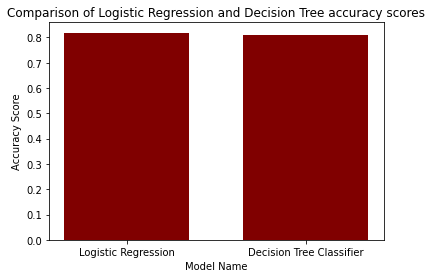

In [18]:
import matplotlib.pyplot as plt

data = {'Logistic Regression':lr_score, 'Decision Tree Classifier':dt_score}
plt.bar(list(data.keys()),list(data.values()),color='maroon', width=0.7)

plt.xlabel("Model Name")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Logistic Regression and Decision Tree accuracy scores")
plt.show()